# Protein Folding
## Introduction

First, let's build a amino acid chain:

In [6]:
%matplotlib auto
import numpy as np
from random import random, randint
import matplotlib.pyplot as plt

from proteinfolding_funcs import plot_aa, save_im
from proteinfolding_classes import AminoAcidChain, ChainBuilder

grid_size = 10

chain = ChainBuilder(grid_size)

Using matplotlib backend: Qt5Agg
Now, please define which amino acids are hydrophobic.
The amino acid chain has been recorded.


Now, we can calculate the energy in the protein you just defined:

Using matplotlib backend: Qt5Agg
The total energy for the configuration is 21 quanta.


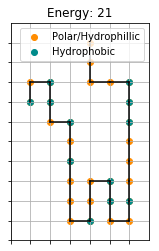

In [17]:
%matplotlib auto
aa = AminoAcidChain( len(chain.x), np.sort(chain.h), np.array(chain.x), np.array(chain.y) )
plot_aa(aa)

print("The total energy for the configuration is %d quanta."%aa.prev_energy)

Step: 4 Update... Old energy:  21.0 New energy: 19.0
Step: 21 Update... Old energy:  19.0 New energy: 17.0
Step: 45 Update... Old energy:  17.0 New energy: 15.0
The lowest energy we could find is 15


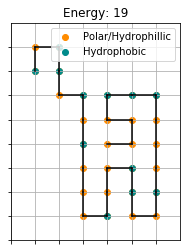

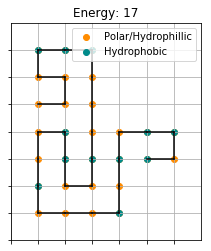

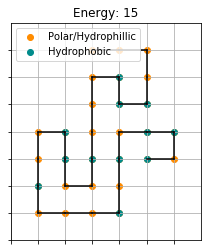

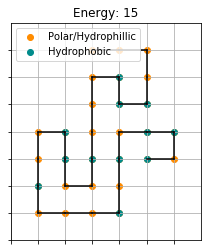

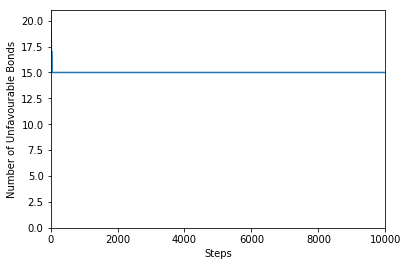

In [18]:
%matplotlib inline

num_steps = 10000
energy_change = np.zeros(num_steps)

step = 0

while step < num_steps:
    success = aa.move() 

    if success == True:
        aa.temp_energy = aa.measure_energy(aa.temp_x, aa.temp_y)
        
        if (aa.temp_energy - aa.prev_energy < 0):            

            print("Step:", step, "Update... Old energy: ", aa.prev_energy, "New energy:", aa.temp_energy)

            aa.x = np.array(aa.temp_x)
            aa.y = np.array(aa.temp_y)
            aa.prev_energy = aa.temp_energy            
            plot_aa(aa)

        else:
            pass
    
        energy_change[step] = aa.prev_energy
        step += 1
    
print("The lowest energy we could find is %d"%aa.prev_energy)

fig, ax = plt.subplots(1,1)
plt.axis([0,len(energy_change), 0, max(energy_change)])
ax.plot(energy_change)
ax.set_xlabel("Steps")
ax.set_ylabel("Number of Unfavourable Bonds")
plt.show()